Code to remove duplicates that appear after combining different databases (Web of Science, Scopus, Scielo, etc).
This is part of the project described in <https://github.com/amchagas/OSH_papers_DB>, check the project readme for more details.

In [1]:
#import necessary libraries
import os
import pandas as pd

import bibtexparser
import matplotlib.pyplot as plt


In [2]:
#databases output path
dataPath = "../data/"
scopusPath = "scopus.bib"
wos1Path = "wos_1to500.bib"
wos2Path = "wos_501to835.bib"
scieloPath = "scielo.bib"

#path to store figures
outputPath = "../figures/"

In [3]:
with open(dataPath+scopusPath) as scopusFile:
    scopusDatabase = bibtexparser.load(scopusFile)
scData = pd.DataFrame(scopusDatabase.entries)

scData.to_csv(dataPath+"scData.csv")

with open(dataPath+wos1Path) as wosFile1:
    wosDatabase = bibtexparser.load(wosFile1)
wosData1 = pd.DataFrame(wosDatabase.entries)

with open(dataPath+wos2Path) as wosFile2:
    wosDatabase = bibtexparser.load(wosFile2)
wosData2 = pd.DataFrame(wosDatabase.entries)

wosData = pd.concat([wosData1,wosData2], axis=0, join='outer', ignore_index=True, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True,sort=False)

wosData.to_csv(dataPath+"wos.csv")

In [6]:
wosData1.keys()

Index(['da', 'unique-id', 'doc-delivery-number', 'journal-iso',
       'usage-count-since-2013', 'usage-count-last-180-days', 'times-cited',
       'number-of-cited-references', 'author-email',
       'web-of-science-categories', 'research-areas', 'keywords-plus',
       'keywords', 'eissn', 'issn', 'doi', 'affiliation', 'language', 'type',
       'address', 'publisher', 'abstract', 'month', 'pages', 'number',
       'volume', 'year', 'journal', 'title', 'author', 'ENTRYTYPE', 'ID',
       'funding-text', 'funding-acknowledgement', 'oa', 'orcid-numbers',
       'researcherid-numbers', 'article-number', 'organization', 'note',
       'isbn', 'booktitle', 'book-group-author', 'meeting', 'series', 'editor',
       'esi-hot-paper', 'esi-highly-cited-paper', 'book-author'],
      dtype='object')

In [42]:
#join all databases
allData = pd.concat([wosData,scData], axis=0, join='outer', ignore_index=True, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True,sort=False)

#web of science exports data with {} on every entry. 
# so the next lines clean it up.
for key in allData.keys():
    allData[key]=allData[key].str.replace("{","")
    allData[key]=allData[key].str.replace("}","")
    
allData.keys()

Index(['da', 'unique-id', 'doc-delivery-number', 'journal-iso',
       'usage-count-since-2013', 'usage-count-last-180-days', 'times-cited',
       'number-of-cited-references', 'author-email',
       'web-of-science-categories', 'research-areas', 'keywords-plus',
       'keywords', 'eissn', 'issn', 'doi', 'affiliation', 'language', 'type',
       'address', 'publisher', 'abstract', 'month', 'pages', 'number',
       'volume', 'year', 'journal', 'title', 'author', 'ENTRYTYPE', 'ID',
       'funding-text', 'funding-acknowledgement', 'oa', 'orcid-numbers',
       'researcherid-numbers', 'article-number', 'organization', 'note',
       'isbn', 'booktitle', 'book-group-author', 'meeting', 'series', 'editor',
       'esi-hot-paper', 'esi-highly-cited-paper', 'book-author', 'source',
       'document_type', 'abbrev_source_title', 'pubmed_id',
       'correspondence_address1', 'url', 'art_number', 'coden',
       'author_keywords', 'page_count'],
      dtype='object')

In [53]:

#convert the year string type to int (making it easier to plot histograms)
#plt.plot(allData.year.astype(int))


'Open-hardware' pioneers push for low-cost lab kit
15-year educational experience on autonomous electronic information
devices by flipped classroom and try-by-yourself methods
15-year educational experience on autonomous electronic information devices by flipped classroom and try-by-yourself methods
19th International Conference on Embedded Computer Systems: Architectures, Modeling, and Simulation, SAMOS 2019
2016 International Conference on Advances in Electrical, Electronic and Systems Engineering, ICAEES 2016
2017 13th Workshop on Intelligent Solutions in Embedded Systems, WISES 2017
2017 2nd International Verification and Security Workshop, IVSW 2017
2017 IEEE International Conference on Information and Automation, ICIA 2017
2018 9th Argentine Symposium and Conference on Embedded Systems, CASE 2018
2018 IEEE 2nd Colombian Conference on Robotics and Automation, CCRA 2018
21st RoboCup International Symposium, 2017
22nd Annual International Solid Freeform Fabrication Symposium - An Ad

In [ ]:

"""
allData.year.plot(kind="hist",
                 fontsize=18,
                 bins=list(set(scData.year+0.5)),
                 rwidth=0.7,
                # color="blue",
                )
                
            
"""

2080


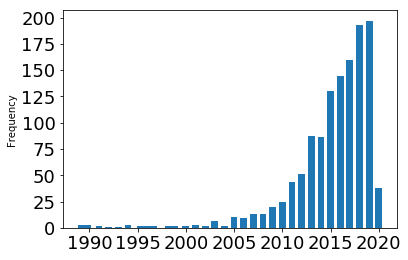

In [7]:
scData.year.plot(kind="hist",
                 fontsize=18,
                 bins=list(set(scData.year+0.5)),
                 rwidth=0.7,
                # color="blue",
                )



number of articles: 468



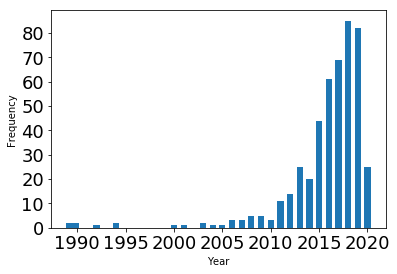

In [13]:

gHandle = scData.year[scData.document_type=="Article"].plot(kind="hist",
                 fontsize=18,
                 bins=list(set(scData.year+0.5)),
                 rwidth=0.65,
                # color="blue",
                )
gHandle.set(xlabel="Year")
gHandle.figure.savefig("test.png")

print("\n"+"number of articles: " + str(len(scData.year[scData.document_type=="Article"]))+ "\n")


Type:           Figure
String form:    Figure(432x288)
File:           ~/.local/lib/python3.7/site-packages/matplotlib/figure.py
Docstring:     
The Figure instance supports callbacks through a *callbacks* attribute
which is a `.CallbackRegistry` instance.  The events you can connect to
are 'dpi_changed', and the callback will be called with ``func(fig)`` where
fig is the `Figure` instance.

Attributes
----------
patch
    The `.Rectangle` instance representing the figure patch.

suppressComposite
    For multiple figure images, the figure will make composite images
    depending on the renderer option_image_nocomposite function.  If
    *suppressComposite* is a boolean, this will override the renderer.
Init docstring:
Parameters
----------
figsize : 2-tuple of floats
    ``(width, height)`` tuple in inches

dpi : float
    Dots per inch

facecolor
    The figure patch facecolor; defaults to rc ``figure.facecolor``

edgecolor
    The figure patch edge color; defaults to rc ``figure.edg

In [10]:
set(scData.language)

{'Chinese',
 'English',
 'English; Portuguese',
 'English; Spanish',
 'German',
 'Italian',
 'Korean',
 'Portuguese',
 'Spanish',
 'Turkish'}